# draft Pre-Processing 

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pycaret

In [2]:
#load dataframe
#parse datetime column
df=pd.read_csv('cov_weather.csv', parse_dates=[0])
df.set_index('date', inplace= True)

In [3]:
df.head()

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_Avg_Temp(F),CT_PRCP(mm),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday
date,,,,,,,,,,,,,
2020-01-22,26.96,0.0,19.04,0.0,18.32,0.0,22.46,0.0,0.0,0.0,0.0,0.0,2
2020-01-23,27.14,0.0,26.60,0.3,23.72,0.0,32.00,0.0,0.0,0.0,0.0,0.0,3
2020-01-24,30.56,0.0,29.48,0.0,33.08,0.0,35.42,0.0,0.0,0.0,0.0,0.0,4
2020-01-27,34.52,1.3,31.46,1.0,38.84,0.0,39.02,0.0,0.0,0.0,0.0,0.0,0
2020-01-28,30.02,0.3,21.56,0.0,36.68,0.0,37.40,0.0,0.0,0.0,0.0,0.0,1


***

In [4]:
df_vt=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [5]:
df_me=df.drop(columns=['VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [6]:
df_ma=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases','weekday'])

In [7]:
df_ct= df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [8]:
df_vt.head()

,VT_Avg_Temp(F),VT_PRCP(mm),VT_Conf_Cases
date,,,
2020-01-22,26.96,0.0,0.0
2020-01-23,27.14,0.0,0.0
2020-01-24,30.56,0.0,0.0
2020-01-27,34.52,1.3,0.0
2020-01-28,30.02,0.3,0.0


In [9]:
df_ma.head()

,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases
date,,,
2020-01-22,22.46,0.0,0.0
2020-01-23,32.00,0.0,0.0
2020-01-24,35.42,0.0,0.0
2020-01-27,39.02,0.0,0.0
2020-01-28,37.40,0.0,0.0


In [10]:
df_ma.tail()

,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases
date,,,
2021-09-03,62.42,0.0,291.0
2021-09-07,68.00,0.0,960.0
2021-09-08,71.96,0.0,260.0
2021-09-09,70.88,8.1,364.0
2021-09-10,68.54,0.0,307.0


In [11]:
df_me.head()

,ME_Avg_Temp(F),ME_PRCP(mm),ME_Conf_Cases
date,,,
2020-01-22,19.04,0.0,0.0
2020-01-23,26.60,0.3,0.0
2020-01-24,29.48,0.0,0.0
2020-01-27,31.46,1.0,0.0
2020-01-28,21.56,0.0,0.0


In [12]:
df_ct.head()

,CT_Avg_Temp(F),CT_PRCP(mm),CT_Conf_Cases
date,,,
2020-01-22,18.32,0.0,0.0
2020-01-23,23.72,0.0,0.0
2020-01-24,33.08,0.0,0.0
2020-01-27,38.84,0.0,0.0
2020-01-28,36.68,0.0,0.0


Although it seems pretty clear visually that none of the temperature and precipitation datasets are random walks, let's just confirm all datasets with an [Augmented Dickey Fuller Test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/). 

In [13]:
res_vt_cc = adfuller(df_vt.VT_Conf_Cases)
print("VT_Conf_Cases ADF:", res_vt_cc)

VT_Conf_Cases ADF: (-3.464483031392258, 0.0089474945053302, 9, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, 1372.9780979482916)


In [14]:
res_vt_temp = adfuller(df_vt['VT_Avg_Temp(F)'])
print("VT_Avg_Temp(F) ADF:", res_vt_temp)

VT_Avg_Temp(F) ADF: (-1.3850715503583493, 0.5894117119797059, 14, 408, {'1%': -3.446479704252724, '5%': -2.8686500930967354, '10%': -2.5705574627547096}, 2737.173417718457)


In [15]:
res_vt_prcp = adfuller(df_vt['VT_PRCP(mm)'])
print("VT_PRCP(mm) ADF:", res_vt_prcp)

VT_PRCP(mm) ADF: (-7.85027472236095, 5.625384540115335e-12, 4, 418, {'1%': -3.4460914174990296, '5%': -2.868479374038333, '10%': -2.570466459559076}, 2588.81431352875)


***

In [16]:
res_ct_cc = adfuller(df_ct.CT_Conf_Cases)
print("CT_Conf_Cases ADF:",res_ct_cc)

CT_Conf_Cases ADF: (-2.1155478635416207, 0.23830885997846413, 18, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 5418.580327990375)


In [17]:
res_ct_temp = adfuller(df_ct['CT_Avg_Temp(F)'])
print("CT_Avg_Temp(F) ADF:", res_ct_temp)

CT_Avg_Temp(F) ADF: (-1.4623595803153135, 0.5520426086668024, 18, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 2586.25770549387)


In [18]:
res_ct_prcp = adfuller(df_ct['CT_PRCP(mm)'])
print("CT_PRCP(mm) ADF:", res_ct_prcp)

CT_PRCP(mm) ADF: (-5.119179653765302, 1.2826061050763963e-05, 8, 414, {'1%': -3.4462444670071046, '5%': -2.8685466682709975, '10%': -2.5705023309762187}, 3054.3030798487416)


***

In [19]:
res_ma_cc = adfuller(df_ma.MA_Conf_Cases)
print("MA_Conf_Cases ADF:",res_ma_cc)

MA_Conf_Cases ADF: (-2.4073554887247623, 0.1396711296794279, 10, 412, {'1%': -3.4463221132914486, '5%': -2.8685808072418824, '10%': -2.570520529031954}, 4914.404375841825)


In [20]:
res_ma_temp = adfuller(df_ma['MA_Avg_Temp(F)'])
print("MA_Avg_Temp(F) ADF:", res_ma_temp)

MA_Avg_Temp(F) ADF: (-1.3998411440798264, 0.5823522736783371, 9, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, 2670.6056777919043)


In [21]:
res_ma_prcp = adfuller(df_ma['MA_PRCP(mm)'])
print("MA_PRCP(mm) ADF:", res_ma_prcp)

MA_PRCP(mm) ADF: (-19.118963656848877, 0.0, 0, 422, {'1%': -3.44594128742536, '5%': -2.868413360220551, '10%': -2.570431271085555}, 3072.9716876471894)


***

In [22]:
res_me_cc = adfuller(df_me.ME_Conf_Cases)
print("ME_Conf_Cases ADF:",res_me_cc)

ME_Conf_Cases ADF: (-2.1245870155377653, 0.23474364532012498, 16, 406, {'1%': -3.4465596717208813, '5%': -2.8686852499495843, '10%': -2.570576203741901}, 1956.0272650586103)


In [23]:
res_me_temp = adfuller(df_me['ME_Avg_Temp(F)'])
print("ME_Avg_Temp(F) ADF:", res_me_temp)

ME_Avg_Temp(F) ADF: (-1.2075162097343841, 0.6703540995802695, 13, 409, {'1%': -3.4464400156784927, '5%': -2.868632644097719, '10%': -2.5705481612974577}, 2752.7970329820932)


In [24]:
res_me_prcp = adfuller(df_me['ME_PRCP(mm)'])
print("ME_PRCP(mm) ADF:", res_me_prcp)

ME_PRCP(mm) ADF: (-17.390438896842983, 5.012959484655681e-30, 0, 422, {'1%': -3.44594128742536, '5%': -2.868413360220551, '10%': -2.570431271085555}, 2757.324502731625)


***

According to the Augmented Dickey Fuller Test, the only data that appears to follow a random walk is: `VT_Conf_Cases`.\
In order to perform time series analysis on **the rest of the data**, we will need to make it stationary. \
__Strong Stationarity:__ entire distribution of data is time-invariant. \
__Weak Stationarity:__ mean, variance, and autocorrelation are time invariant (easier to test).

Because `VT_Conf_Cases` is a random walk, we will compute __first differences__ and then recalculate p-value of rejecting the null hyppothesis with ADF test (for `VT_Conf_Cases` only). 

In [25]:
df_vt['VT_Conf_Cases'] = df_vt['VT_Conf_Cases'].diff()

Quick visual check to make sure transformation was completed successfully:

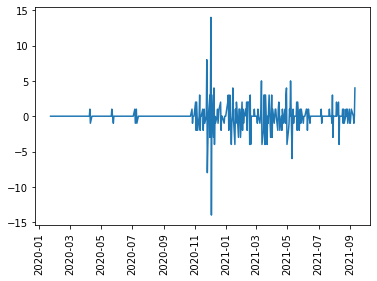

In [26]:
plt.plot(df_vt['VT_Conf_Cases'])
plt.xticks(rotation=90)
plt.show()

Because we took first differences of the Vermont data set, the first value of `VT_Conf_Cases` will become `NaN` (there is no data prior to the first piece of data). We could delete the row, or perform the ADF test from the second row of data on, but there is an even simpler solution to this problem. Vermont's [first COVID-19 case](https://www.vpr.org/vpr-news/2020-03-08/health-officials-announce-first-coronavirus-case-in-vermont) wasn't until March of 2020. Therefore, we know that the day before our first data point (on 01/21/2021), the number of confirmed cases in Vermont must also have been zero. The difference between zero and zero is obvioulsy zero, so we can confidently replace this particular `NaN` with a zero, and thereby prevent losing a row of data.

In [27]:
# Confirm first value of VT's cases is NaN:
print(df_vt.VT_Conf_Cases[0])

nan


In [28]:
#Replace NaN with 0:
df_vt.VT_Conf_Cases[0] = 0
df_vt.head()

,VT_Avg_Temp(F),VT_PRCP(mm),VT_Conf_Cases
date,,,
2020-01-22,26.96,0.0,0.0
2020-01-23,27.14,0.0,0.0
2020-01-24,30.56,0.0,0.0
2020-01-27,34.52,1.3,0.0
2020-01-28,30.02,0.3,0.0


In [29]:
adfuller(df_vt.VT_Conf_Cases)

(-8.894236499908642,
 1.2191232986117568e-14,
 14,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 1378.3626298456832)

Now all of the data appears stationary and we have no more `NaN` values in the Vermont dataset.

----------------------------------------------------------------------------------------------------------------------

In [ ]:
df_vt['state_id'] = 'VT'
df_ct['state_id'] = 'CT'
df_me['state_id'] = 'ME'
df_ma['state_id'] = 'MA'

In [ ]:
df_vt.rename(columns={'VT_Avg_Temp(F)':'Avg_Temp(F)', 'VT_PRCP(mm)':'PRCP(mm)', 'VT_Conf_Cases':'Conf_Cases'}, inplace=True)
df_ct.rename(columns={'CT_Avg_Temp(F)':'Avg_Temp(F)', 'CT_PRCP(mm)':'PRCP(mm)', 'CT_Conf_Cases':'Conf_Cases'}, inplace=True)
df_me.rename(columns={'ME_Avg_Temp(F)':'Avg_Temp(F)', 'ME_PRCP(mm)':'PRCP(mm)', 'ME_Conf_Cases':'Conf_Cases'}, inplace=True)
df_ma.rename(columns={'MA_Avg_Temp(F)':'Avg_Temp(F)', 'MA_PRCP(mm)':'PRCP(mm)', 'MA_Conf_Cases':'Conf_Cases'}, inplace=True)

In [ ]:
df_list = [df_vt, df_ct, df_me, df_ma]
for df in df_list:
    df.reset_index(inplace=True)

In [ ]:
df_ma2 = df_ma[df_ma['date']< '2021-03-01']

In [ ]:
df_ma2.tail()

In [ ]:
df_ct2 = df_ct[df_ct['date']< '2021-03-01']

In [ ]:
df_all = pd.concat([df_ct2, df_ma2],axis=0)

In [ ]:
df_all

In [ ]:
df_all['day_of_week'] = [i.dayofweek for i in df_all['date']]
df_all['day_of_year'] = [i.dayofyear for i in df_all['date']]
df_all['Year'] =[i.year for i in df_all['date']]
df_all['Month'] = [i.month for i in df_all['date']]
df_all['Day'] = [i.day for i in df_all['date']]

In [ ]:
df_all.head()

In [ ]:
df_all.tail()

In [ ]:
df_all.reset_index(inplace=True)

In [ ]:
df_all.drop(['index'], axis=1, inplace=True)

In [ ]:
df_all

In [ ]:
from pycaret.regression import *
all_results=[]
#all_states = ['VT', 'CT', 'ME', 'MA']

#df_subset = df_all[df_all['state_id'] == i]
# initialize setup from pycaret.regression
s = setup(df_all, target = 'Conf_Cases', train_size = 0.8,
                data_split_shuffle = True, fold = 3,
                ignore_features = ['date', 'PRCP(mm)', 'state_id'],
                numeric_features = ['day_of_year', 'Year', 'Avg_Temp(F)', 'Month', 'day_of_week'],
                silent = True, verbose = False, session_id = 123,
                normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=False)
    
# capture the compare result grid and store best model in list
#p = pull().iloc[0:1]
#p['time_series'] = str(i)
#all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
#f = finalize_model(best_model)
best_model

In [ ]:
compare_models()

In [ ]:
concat_results = pd.concat(all_results,axis=0)
concat_results.head()

In [30]:
# Make duplicates of datasets for processing with Pycaret:
df_vt2 = df_vt.reset_index()
df_ct2 = df_ct.reset_index()
df_me2 = df_me.reset_index()
df_ma2 = df_ma.reset_index()

In [31]:
df_ma2

,date,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases
0,2020-01-22,22.46,0.0,0.0
1,2020-01-23,32.00,0.0,0.0
2,2020-01-24,35.42,0.0,0.0
3,2020-01-27,39.02,0.0,0.0
4,2020-01-28,37.40,0.0,0.0
...,...,...,...,...
418,2021-09-03,62.42,0.0,291.0
419,2021-09-07,68.00,0.0,960.0
420,2021-09-08,71.96,0.0,260.0
421,2021-09-09,70.88,8.1,364.0


In [32]:
# create a list of dataframes to iterate through:
df_list = [df_vt2, df_ct2, df_me2, df_ma2]

In [33]:
# Add 'day_of_week' and 'day_of_year' columns to each dataframe
for df in df_list:
    df['day_of_week'] = [i.dayofweek for i in df['date']]
    df['day_of_year'] = [i.dayofyear for i in df['date']]
    df['Year'] =[i.year for i in df['date']]
    df['Month'] = [i.month for i in df['date']]
    df['Day'] = [i.day for i in df['date']]

In [34]:
df_ma2.head()

,date,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases,day_of_week,day_of_year,Year,Month,Day
0,2020-01-22,22.46,0.0,0.0,2,22,2020,1,22
1,2020-01-23,32.00,0.0,0.0,3,23,2020,1,23
2,2020-01-24,35.42,0.0,0.0,4,24,2020,1,24
3,2020-01-27,39.02,0.0,0.0,0,27,2020,1,27
4,2020-01-28,37.40,0.0,0.0,1,28,2020,1,28


In [35]:
from pycaret.regression import *
all_results=[]
df_subset = df_ma2

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'MA_Conf_Cases', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'MA_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'MA_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'MAE', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("MA")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [36]:
concat_results = pd.concat(all_results,axis=0)
concat_results.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
et,Extra Trees Regressor,61.8737,12742.7995,112.4221,0.8522,0.5572,0.3337,0.43,MA


In [ ]:
all_results=[]
df_subset = df_me2

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'ME_Conf_Cases', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'ME_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'ME_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("ME")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

In [ ]:
concat_results = pd.concat([pd.concat(all_results, axis=0), concat_results], axis=0)
concat_results

In [37]:
all_results=[]
df_subset = df_ct2

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'CT_Conf_Cases', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'CT_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'CT_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'MAE', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("CT")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

In [38]:
concat_results = pd.concat([pd.concat(all_results, axis=0), concat_results], axis=0)
concat_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),time_series
catboost,CatBoost Regressor,92.0222,43203.1905,198.1478,0.5498,1.3388,1.1098,0.1867,CT
et,Extra Trees Regressor,61.8737,12742.7995,112.4221,0.8522,0.5572,0.3337,0.4300,MA


In [ ]:
all_results=[]
df_subset = df_vt2

# initialize setup from pycaret.regression
s = setup(df_subset, target = 'VT_Conf_Cases', train_size = 0.8,
            data_split_shuffle = True, fold = 3,
            ignore_features = ['date', 'VT_PRCP(mm)'],
            numeric_features = ['day_of_year', 'Year', 'VT_Avg_Temp(F)'],
            categorical_features = ['Month', 'day_of_week'],
            silent = True, verbose = False, session_id = 123,
            normalize=True)
    
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'MAE', verbose=False)
    
# capture the compare result grid and store best model in list
p = pull().iloc[0:1]
p['time_series'] = str("VT")
all_results.append(p)
    
# finalize model i.e. fit on entire data including test set
f = finalize_model(best_model)
best_model

In [ ]:
concat_results = pd.concat([pd.concat(all_results, axis=0), concat_results], axis=0)
concat_results

----------------------------------------------------------------------------------------------------------------------

In [ ]:
df2=df.reset_index()

In [ ]:
df2.head()

In [ ]:
df2['VT_Conf_Cases'] = df2['VT_Conf_Cases'].diff()

In [ ]:
plt.plot(df2['VT_Conf_Cases'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Replace NaN with 0:
df2.VT_Conf_Cases[0] = 0
df2.head()

In [ ]:
# Add 'day_of_week' and 'day_of_year' columns to each dataframe
df2['day_of_week'] = [i.dayofweek for i in df2['date']]
df2['day_of_year'] = [i.dayofyear for i in df2['date']]
df2['Year'] =[i.year for i in df2['date']]
df2['Month'] = [i.month for i in df2['date']]
df2['Day'] = [i.day for i in df2['date']]

In [ ]:
df2.head()

In [ ]:
from pycaret.regression import *
all_results=[]

for i in 
    # initialize setup from pycaret.regression
    s = setup(df_subset, target = 'MA_Conf_Cases', train_size = 0.8,
                data_split_shuffle = True, fold = 3,
                ignore_features = ['date', 'MA_PRCP(mm)'],
                numeric_features = ['day_of_year', 'Year', 'MA_Avg_Temp(F)'],
                categorical_features = ['Month', 'day_of_week'],
                silent = True, verbose = False, session_id = 123,
                normalize=True)
    
    # compare all models and select best one based on MAE
    best_model = compare_models(sort = 'MAE', verbose=False)
    
    # capture the compare result grid and store best model in list
    p = pull().iloc[0:1]
    p['time_series'] = str("MA")
    all_results.append(p)
    
    # finalize model i.e. fit on entire data including test set
    f = finalize_model(best_model)
    best_model